In [15]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as plt
import numpy as np

In [5]:
trainX = pd.read_csv("train.csv").select_dtypes(exclude=['object']).fillna(method="bfill", axis=0).fillna(0)
trainy = trainX.pop("SalePrice")
testX = pd.read_csv("test.csv").select_dtypes(exclude=['object']).fillna(method="bfill", axis=0).fillna(0)

input_shape=[trainX.shape[1]]

In [6]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=input_shape),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1),
])

In [7]:
model.compile(
    optimizer="adam",
    loss="mae"
)


In [8]:
history = model.fit(
    trainX, trainy,
    validation_data=(trainX, trainy),
    epochs=200,)

621 - val_loss: 27659.2812
Epoch 17/200
46/46 [==============================] - 0s 2ms/step - loss: 27300.5159 - val_loss: 27109.6680
Epoch 18/200
46/46 [==============================] - 0s 2ms/step - loss: 26992.4275 - val_loss: 27147.9570
Epoch 19/200
46/46 [==============================] - 0s 2ms/step - loss: 26843.9384 - val_loss: 27154.5020
Epoch 20/200
46/46 [==============================] - 0s 2ms/step - loss: 26171.2980 - val_loss: 28200.8848
Epoch 21/200
46/46 [==============================] - 0s 2ms/step - loss: 28495.9038 - val_loss: 26830.8594
Epoch 22/200
46/46 [==============================] - 0s 2ms/step - loss: 26129.6107 - val_loss: 27028.1230
Epoch 23/200
46/46 [==============================] - 0s 2ms/step - loss: 27936.4390 - val_loss: 26687.3125
Epoch 24/200
46/46 [==============================] - 0s 2ms/step - loss: 26601.5381 - val_loss: 26619.1992
Epoch 25/200
46/46 [==============================] - 0s 2ms/step - loss: 27287.6069 - val_loss: 26963.4238
E

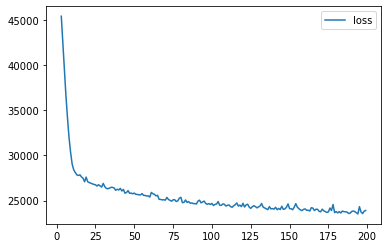

In [9]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[3:, ['loss']].plot()

In [10]:
prediction = model.predict(testX)
thePrediction = pd.DataFrame(prediction, columns=['SalePrice']).to_csv("pred1.csv")
#df = pd.read_csv('pred.csv', delim_whitespace=True, sep=r'\s*,\s*', delimiter=",")
#print(df8)
#print(df.columns.tolist()[1])
#print(df["SalePrice"])
#print(thePrediction["Id"]) 

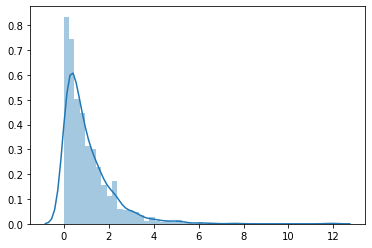

In [23]:
n=np.random.exponential(size=1000)

fig, ax = plt.pyplot.subplots(1)
import seaborn as sns
sns.distplot(n, ax=ax)
